**Wine Quality Data Set – Red Wine**

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Loading Dataset

In [ ]:
dataset = pd.read_csv('/content/winequality-red.csv',sep=';')

Dataset

In [ ]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Preliminary Data Analysis

In [ ]:
#printing the information about the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#printing description of the data in the dataframe
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#printing number of rows and columns 
dataset.shape

(1599, 12)

In [ ]:
#to check the null values
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# to check the unique values of the column - quality
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# to check the distribution of data with reference to above
dataset.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

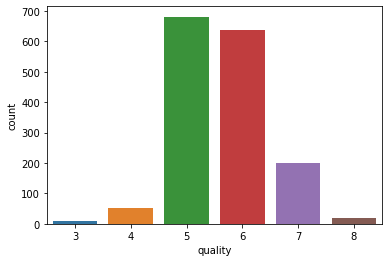

In [ ]:
sns.countplot(x='quality', data=dataset)

From the plot we can observe that the quality range is between 3 to 8 so for better understanding we can create a new categorical feature - rating, where 
poor: 1-4
average: 5-6
good: 7-10


In [ ]:
conditions = [
    (dataset['quality'] >= 7),
    (dataset['quality'] <= 4)
]
rating = ['good', 'poor']
dataset['rating'] = np.select(conditions, rating, default='average')
dataset.rating.value_counts()

average    1319
good        217
poor         63
Name: rating, dtype: int64

In [ ]:
dataset.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949
poor,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270


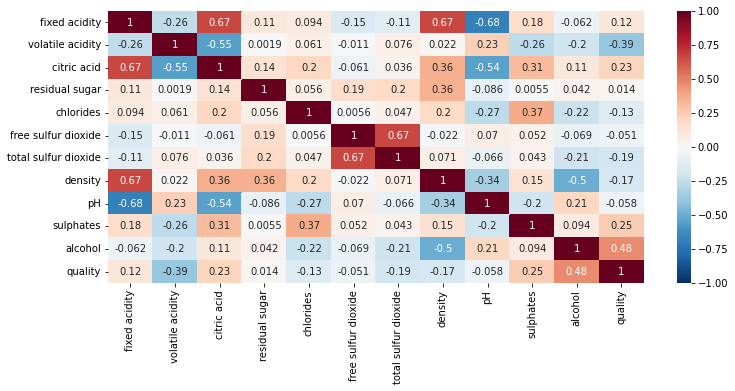

In [ ]:
# to check corelation between the features lets plot a heat map
correlation = dataset.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Sorting the values in order to find out the columns which the highly co-related.

In [ ]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

we can notice that the columns - alcohol, sulphates, citric acid and fixed acidity are highly related as compared to others so we will use these features for further analysis.

[Text(0, 0.5, 'Percentaage of Alcohol'),
 Text(0.5, 0, 'Wine Rating'),
 Text(0.5, 1.0, 'Alcohol vs Rating')]

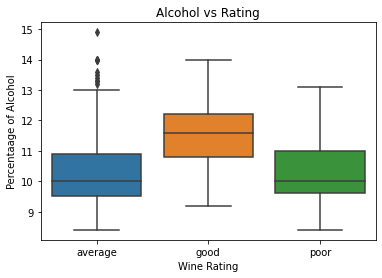

In [ ]:
# to check the Alcohol percentage with the rating of wine:
bx = sns.boxplot(x="rating", y='alcohol', data = dataset)
bx.set(xlabel='Wine Rating', ylabel='Percentaage of Alcohol', title='Alcohol vs Rating')


Now we will analyse the wine rating with respect to sulphates

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Sulphates v/s Wine ratings')]

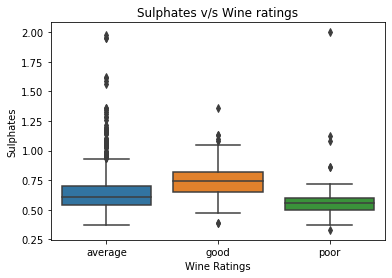

In [ ]:
bx = sns.boxplot(x="rating", y='sulphates', data = dataset)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates v/s Wine ratings')

# Now we will check citric acid with respect to wine ratings

[Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Citric acid v/s Wine ratings')]

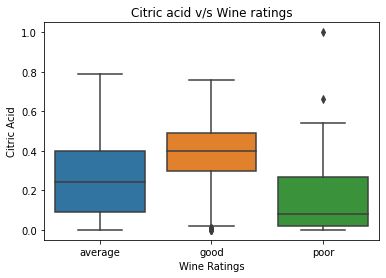

In [ ]:
bx = sns.boxplot(x="rating", y='citric acid', data = dataset)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric acid v/s Wine ratings') 

MODELLING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
#Splitting the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)
print("Number of samples in training set:", X_train.shape[0])
print("Number of samples in testing set:", X_test.shape[0])

Number of samples in training set: 1199
Number of samples in testing set: 400


In [ ]:
# Fitting and Predicting the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Finding the Accuracy score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("Accuracy", score)

Accuracy 0.9075


In [ ]:
from keras.models import Sequential
 
# Import `Dense` from `keras.layers`
from keras.layers import Dense
 
# Initialize the constructor
model = Sequential()
 
# Add an input layer
model.add(Dense(12, activation ='relu', input_shape =(11, )))
 
# Add one hidden layer
model.add(Dense(9, activation ='relu'))
 
# Add an output layer
model.add(Dense(1, activation ='sigmoid'))
 
# Model output shape
model.output_shape
 
# Model summary
model.summary()
 
# Model config
model.get_config()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                144       
                                                                 
 dense_7 (Dense)             (None, 9)                 117       
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_6_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_7',
    'trainable': True,
    'dtype': 'float32',
    'units': 9,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_i

In [ ]:
# List all weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy',
  optimizer ='adam', metrics =['accuracy'])

In [ ]:
# Training Model
model.fit(X_train, y_train, epochs = 200,
           batch_size = 1, verbose = 1)
  
# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)

Epoch 1/200
1199/1199 [==============================] - 2s 2ms/step - loss: 0.4165 - accuracy: 0.8474
Epoch 2/200
1199/1199 [==============================] - 2s 2ms/step - loss: 0.3403 - accuracy: 0.8574
Epoch 3/200
1199/1199 [==============================] - 2s 2ms/step - loss: 0.3072 - accuracy: 0.8649
Epoch 4/200
1199/1199 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8649
Epoch 5/200
1199/1199 [==============================] - 2s 2ms/step - loss: 0.2918 - accuracy: 0.8682
Epoch 6/200
1199/1199 [==============================] - 2s 2ms/step - loss: 0.2891 - accuracy: 0.8641
Epoch 7/200
1199/1199 [==============================] - 2s 2ms/step - loss: 0.2850 - accuracy: 0.8757
Epoch 8/200
1199/1199 [==============================] - 2s 2ms/step - loss: 0.2840 - accuracy: 0.8716
Epoch 9/200
1199/1199 [==============================] - 2s 2ms/step - loss: 0.2845 - accuracy: 0.8782
Epoch 10/200
1199/1199 [==============================] - 2s 2ms/step - l

In [ ]:
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Conclusion

 - From the above Analysis we can conclude that changing the 'Quality' column to 'Rating' was very helpful and we got some insights how the Quality of wine is affected by alcohol, sulphates, citric acid and fixed acidity as they are highly related as compared to others.

- For wine Quality Prediction we trained two models and both performed good.

